In [1]:
#載入資料
import pandas as pd  
import numpy as np  
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [2]:
#fill ?
df.replace('?',np.nan,inplace = True)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])
for i in df.columns:
    df[i].fillna(value=df.groupby('Class')[i].transform('mean'), inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
#split data and train
X = df.iloc[:,1:10]
y = df.iloc[:,10]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)#random split

In [5]:
x_mean = X_train.mean().values

In [6]:
C = X_train - x_mean

In [7]:
C_covariance = C.cov().values

In [9]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(C_covariance)

In [9]:
PoV_k = []
for k in range(len(eigenvalues)):
    PoV_k.append(sum(eigenvalues[:k+1])/sum(eigenvalues))

In [10]:
PoV_k

[0.6883197831209517,
 0.7614178562555092,
 0.8211097134299754,
 0.8653876863939772,
 0.9052516994977997,
 0.9398316178417797,
 0.9617813315964548,
 0.9880085307004154,
 1.0]

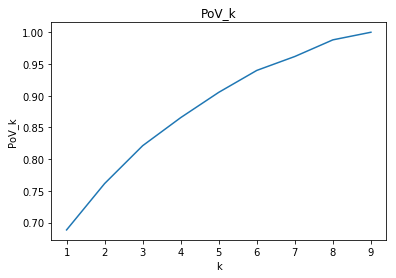

In [12]:
from matplotlib import pyplot as plt 
plt.title("PoV_k") 
plt.xlabel("k") 
plt.ylabel("PoV_k") 
plt.plot([1,2,3,4,5,6,7,8,9],PoV_k) 
plt.show()

k0 從5開始大於0.9